In [67]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import os
import zipfile
import tensorflow as tf


In [68]:
Main_data = pd.read_csv( 'drive/My Drive/kaggle/diabetes/diabetes.csv')

In [69]:
Main_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
Main_data.shape

(768, 9)

In [71]:
Main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Heatmap of Correlation**

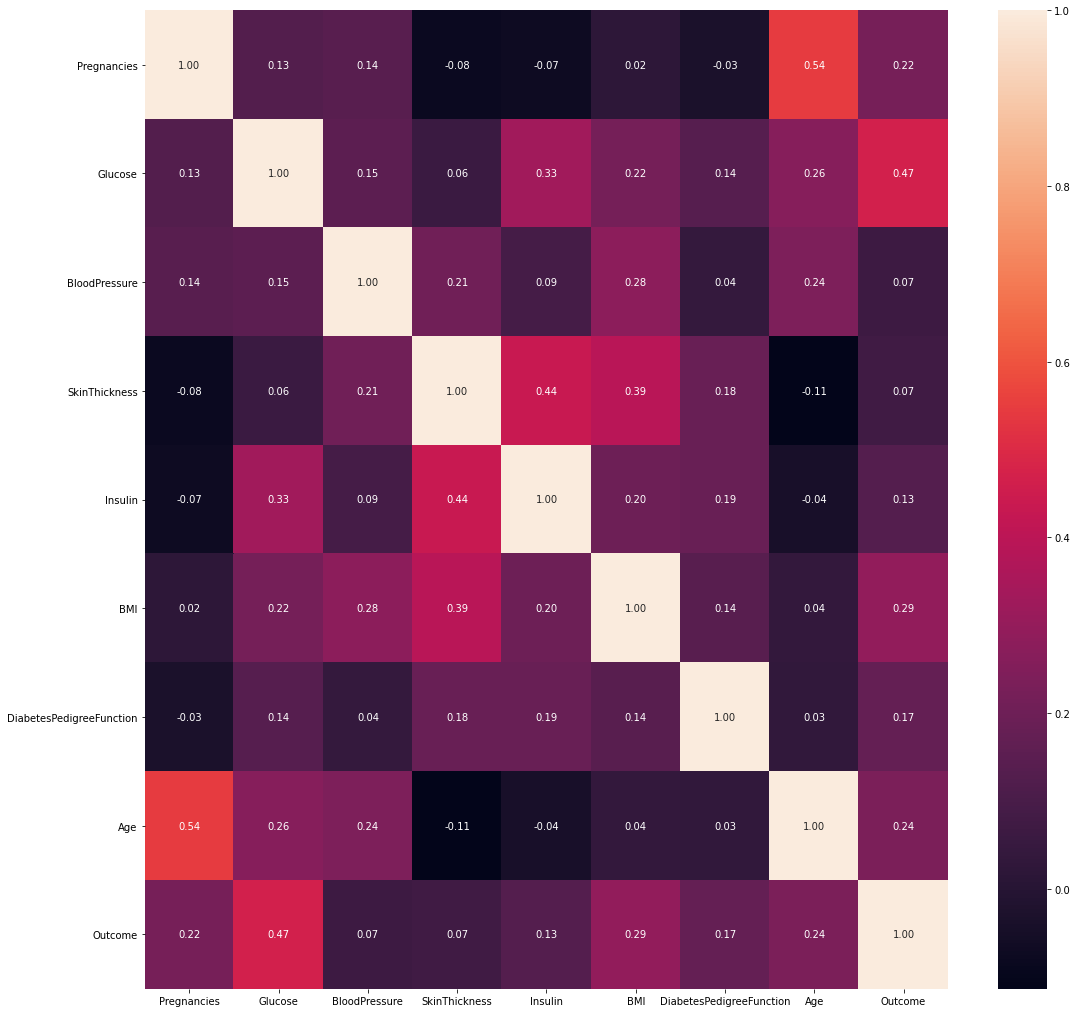

In [72]:
plt.subplots(figsize=(18,18))
sns.heatmap(Main_data.corr(), annot=True, fmt=".2f")
plt.show()

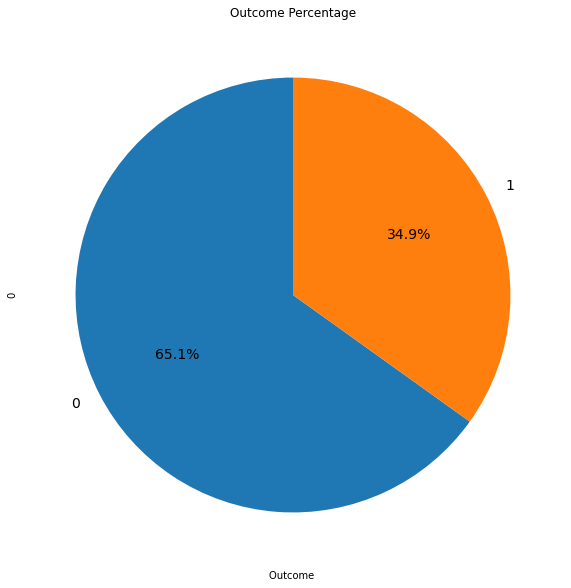

In [73]:
Outcome = Main_data[['Outcome']]

outcome = Outcome.groupby(['Outcome']).size().reset_index()
outcome.plot(kind='pie' ,y = 0, autopct='%1.1f%%',  title = "Outcome Percentage",
startangle=90, shadow=False, labels=  outcome['Outcome'], legend = False, fontsize=14, figsize=(10, 10))
plt.xlabel('Outcome ')
plt.show()

In [74]:
start = 0
stop = 12
number_of_lines=  Main_data['SkinThickness'].shape[0]
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

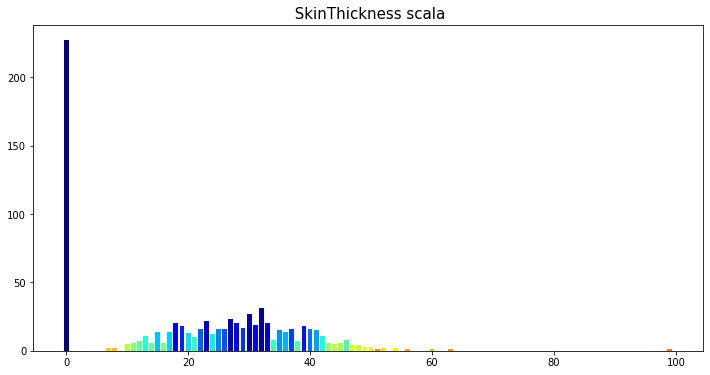

In [75]:
plt.subplots(figsize=(12,6))
SkinThickness =  Main_data['SkinThickness'].value_counts()
plt.bar( SkinThickness.index ,    SkinThickness.values ,color= colors  )
plt.title(" SkinThickness scala" ,fontsize=15 )

plt.show()

In [76]:
start = 0
stop = 12
number_of_lines=  Main_data['Age'].shape[0]
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

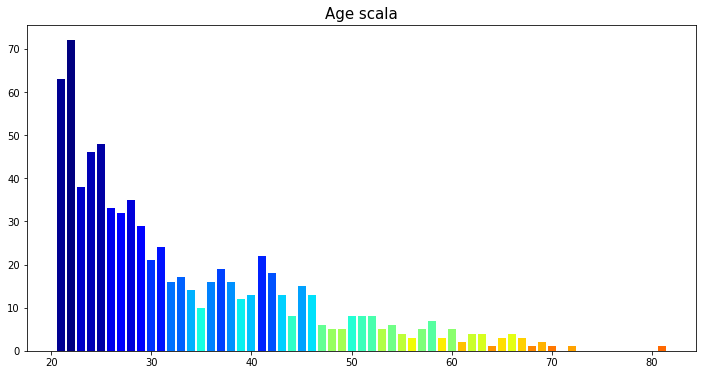

In [77]:
plt.subplots(figsize=(12,6))
Age =  Main_data['Age'].value_counts()
plt.bar(Age.index ,  Age .values ,color= colors  )
plt.title("Age scala" ,fontsize=15 )

plt.show()

In [78]:
start = 0
stop = 10
number_of_lines=  Main_data['Glucose'].shape[0]
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

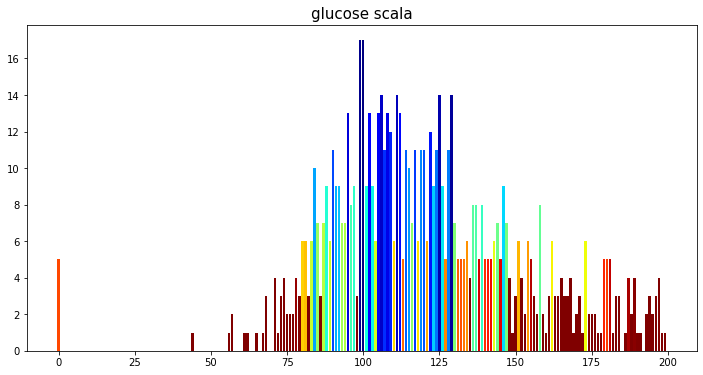

In [79]:
plt.subplots(figsize=(12,6))
glucose =  Main_data['Glucose'].value_counts()
plt.bar(glucose.index ,  glucose.values ,color= colors  )
plt.title("glucose scala" ,fontsize=15 )

plt.show()

In [80]:
start = 0
stop = 12
number_of_lines=  Main_data['BMI'].shape[0]
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

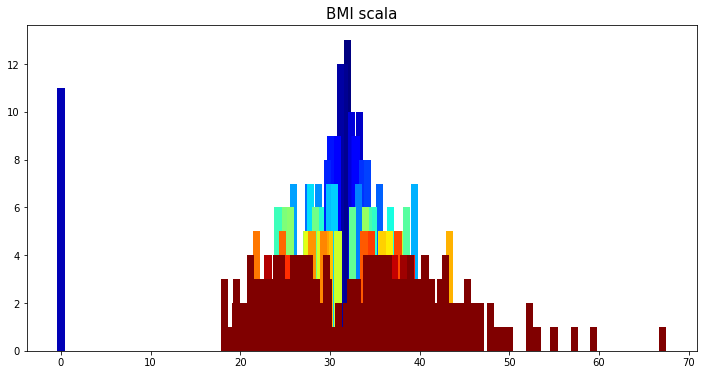

In [81]:
plt.subplots(figsize=(12,6))
BMI =  Main_data['BMI'].value_counts()
plt.bar(BMI.index ,  BMI.values ,color= colors  )
plt.title("BMI scala" ,fontsize=15 )

plt.show()

In [82]:
start = 0
stop = 112
number_of_lines=  Main_data['Pregnancies'].shape[0]
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

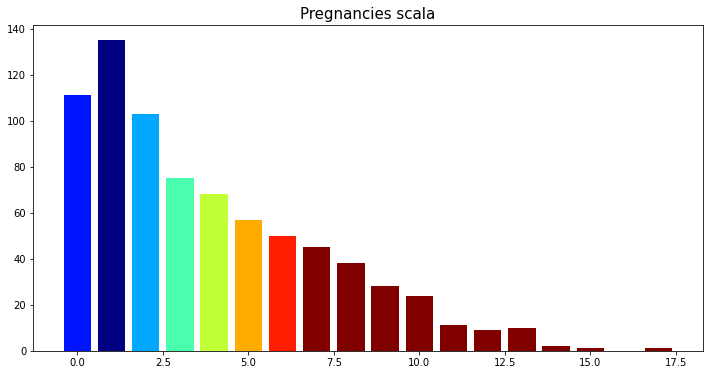

In [83]:
plt.subplots(figsize=(12,6))
Pregnancies =  Main_data['Pregnancies'].value_counts()
plt.bar( Pregnancies.index ,  Pregnancies.values ,color= colors  )
plt.title("Pregnancies scala" ,fontsize=15 )

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


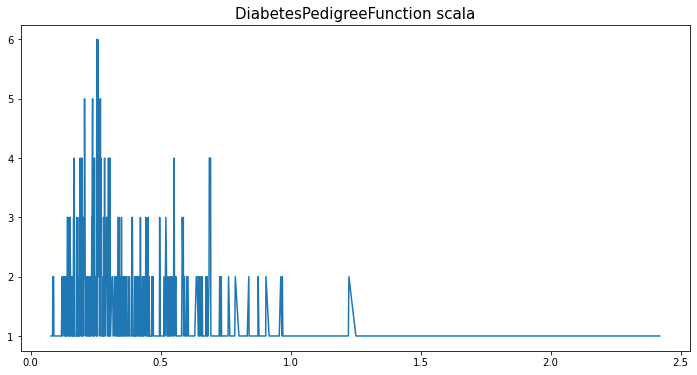

In [84]:
plt.subplots(figsize=(12,6))
DiabetesPedigreeFunction =  Main_data['DiabetesPedigreeFunction'].value_counts()
sns.lineplot( DiabetesPedigreeFunction.index ,  DiabetesPedigreeFunction.values   )
plt.title("DiabetesPedigreeFunction scala" ,fontsize=15 )

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


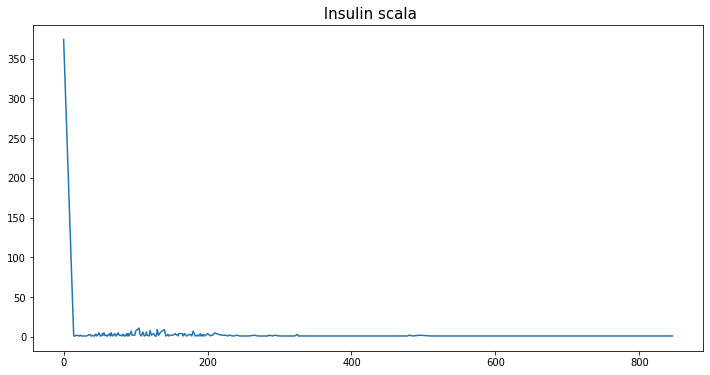

In [85]:
plt.subplots(figsize=(12,6))
Insulin =  Main_data['Insulin'].value_counts()
sns.lineplot( Insulin.index ,  Insulin.values  )
plt.title(" Insulin scala" ,fontsize=15 )
plt.show()

In [86]:
start = 0
stop = 15
number_of_lines=  Main_data['BloodPressure'].shape[0]
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

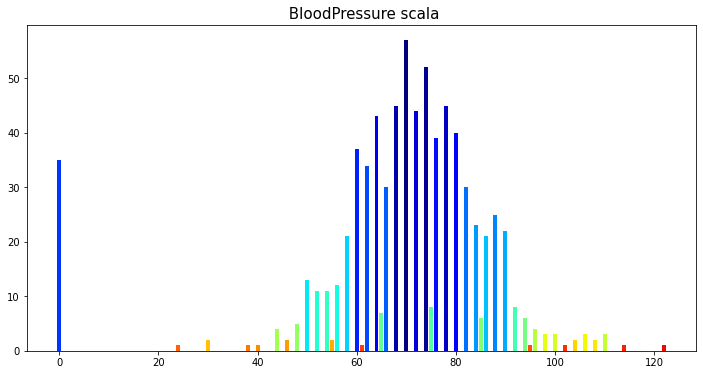

In [87]:
plt.subplots(figsize=(12,6))
BloodPressure =  Main_data['BloodPressure'].value_counts()
plt.bar( BloodPressure.index ,  BloodPressure.values , color = colors  )
plt.title(" BloodPressure scala" ,fontsize=15 )
plt.show()

Some features does contain too many '0' value. That probably means these values actually are 'nan' values. We have to convert these values ,  before the next step.

#**Feature Encoding**

In [88]:
Mean_Data = Main_data[ (Main_data['BMI'] != 0) &  (Main_data['Glucose'] != 0) & (Main_data['Insulin'] != 0) & (Main_data['BloodPressure'] != 0) & (Main_data['SkinThickness'] !=0)   ].copy()

In [89]:
Mean_Data.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

**BMI**

In [90]:
Main_data['BMI'].replace(0,33.08, inplace =True)

**Glucose**

In [91]:
Main_data['Glucose'].replace(0,122, inplace =True)

**Insulin**

In [92]:
Main_data['Insulin'].replace(0,156, inplace =True)

**BloodPressure**

In [93]:
Main_data['BloodPressure'].replace(0,71, inplace =True)

**SkinThickness**

In [94]:
Main_data['SkinThickness'].replace(0,29, inplace =True)

In [95]:
Main_test = Main_data[['Outcome']].copy()

In [96]:
Main_data.drop(['Outcome'] , axis = 1,inplace= True)

In [97]:
Main_data['Age'].replace([ _ for _ in range(0,25)],'very young', inplace =True)
Main_data['Age'].replace([ _ for _ in range(25,30)],'young', inplace =True)
Main_data['Age'].replace([ _ for _ in range(30,45)],'middle', inplace =True)
Main_data['Age'].replace([ _ for _ in range(45,60)],'old', inplace =True)
Main_data['Age'].replace([ _ for _ in range(60,100)],'very old', inplace =True)

In [98]:
Main_data['BloodPressure'].replace([ _ for _ in range(0,55)],'very low', inplace =True)
Main_data['BloodPressure'].replace([ _ for _ in range(55,60)],'low', inplace =True)
Main_data['BloodPressure'].replace([ _ for _ in range(60,75)],'medium', inplace =True)
Main_data['BloodPressure'].replace([ _ for _ in range(75,85)],'high', inplace =True)
Main_data['BloodPressure'].replace([ _ for _ in range(85,1000)],'very high', inplace =True)

In [99]:
Main_data['Glucose'].replace([ _ for _ in range(0,80)],'very low', inplace =True)
Main_data['Glucose'].replace([ _ for _ in range(80,120)],'low', inplace =True)
Main_data['Glucose'].replace([ _ for _ in range(120,123)],'medium', inplace =True)
Main_data['Glucose'].replace([ _ for _ in range(123,130)],'high', inplace =True)
Main_data['Glucose'].replace([ _ for _ in range(130,1000)],'very high', inplace =True)

In [100]:
Main_data['Insulin'].replace([ _ for _ in range(0,80)],'very low', inplace =True)
Main_data['Insulin'].replace([ _ for _ in range(80,150)],'low', inplace =True)
Main_data['Insulin'].replace([ _ for _ in range(150,158)],'medium', inplace =True)
Main_data['Insulin'].replace([ _ for _ in range(158,230)],'high', inplace =True)
Main_data['Insulin'].replace([ _ for _ in range(230,1000)],'very high', inplace =True)

In [101]:
Main_data['Pregnancies'].replace([ _ for _ in range(0,1)],'very low', inplace =True)
Main_data['Pregnancies'].replace([ _ for _ in range(1,2)],'low', inplace =True)
Main_data['Pregnancies'].replace([ _ for _ in range(2,4)],'medium', inplace =True)
Main_data['Pregnancies'].replace([ _ for _ in range(4,6)],'high', inplace =True)
Main_data['Pregnancies'].replace([ _ for _ in range(6,1000)],'very high', inplace =True)

In [102]:
Main_data['SkinThickness'].replace([ _ for _ in range(0,10)],'very low', inplace =True)
Main_data['SkinThickness'].replace([ _ for _ in range(10,28)],'low', inplace =True)
Main_data['SkinThickness'].replace([ _ for _ in range(28,30)],'medium', inplace =True)
Main_data['SkinThickness'].replace([ _ for _ in range(30,40)],'high', inplace =True)
Main_data['SkinThickness'].replace([ _ for _ in range(40,1000)],'very high', inplace =True)

In [103]:
Main_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,very high,very high,medium,high,medium,33.6,0.627,old
1,low,low,medium,medium,medium,26.6,0.351,middle
2,very high,very high,medium,medium,medium,23.3,0.672,middle


**Defining to Categorical Columns**

In [104]:
def labeler(data):
  cat_col = []
  bin_col = []
  columns = data.columns.tolist()
  for col in columns:
    if (type(data[col].values[0]) == str )  and (np.unique(data[col].values).any != 2):
      cat_col.append(col)
    else:
      bin_col.append(col)  
  return cat_col , bin_col    

In [105]:
cat_col , bin_col   = labeler(Main_data)

**One Hot Encoding**

In [106]:
Main_data = pd.get_dummies(Main_data , columns = cat_col)

In [107]:
Main_data.head(3)

,BMI,DiabetesPedigreeFunction,Pregnancies_high,Pregnancies_low,Pregnancies_medium,Pregnancies_very high,Pregnancies_very low,Glucose_high,Glucose_low,Glucose_medium,Glucose_very high,Glucose_very low,BloodPressure_high,BloodPressure_low,BloodPressure_medium,BloodPressure_very high,BloodPressure_very low,SkinThickness_high,SkinThickness_low,SkinThickness_medium,SkinThickness_very high,SkinThickness_very low,Insulin_high,Insulin_low,Insulin_medium,Insulin_very high,Insulin_very low,Age_middle,Age_old,Age_very old,Age_very young,Age_young
0,33.6,0.627,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,26.6,0.351,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,23.3,0.672,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


**Separating dataset**

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split( Main_data, Main_test , test_size=0.2, random_state=42)

In [110]:
X_train.head()

,BMI,DiabetesPedigreeFunction,Pregnancies_high,Pregnancies_low,Pregnancies_medium,Pregnancies_very high,Pregnancies_very low,Glucose_high,Glucose_low,Glucose_medium,Glucose_very high,Glucose_very low,BloodPressure_high,BloodPressure_low,BloodPressure_medium,BloodPressure_very high,BloodPressure_very low,SkinThickness_high,SkinThickness_low,SkinThickness_medium,SkinThickness_very high,SkinThickness_very low,Insulin_high,Insulin_low,Insulin_medium,Insulin_very high,Insulin_very low,Age_middle,Age_old,Age_very old,Age_very young,Age_young
60,33.08,0.304,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
618,28.20,1.282,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
346,28.70,0.654,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
294,21.90,0.254,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
231,46.20,0.238,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


# **Defining Models**

We are going to define different types of models and train them. After the training, we are going to compare  accuracy score of each of these models

In [111]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
predictinons_scores = dict()

**Training**

---



**Random Forest Classifier**

In [112]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
RFC_pred = classifier.predict(X_test)
RFC_score = accuracy_score(y_test,RFC_pred,normalize= True)
predictinons_scores['RFC_score'] = RFC_score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


**XGBOOST**

In [113]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
XG_pred = classifier.predict(X_test)
XG_score = accuracy_score(y_test,XG_pred,normalize=True)
predictinons_scores['XG_score'] = XG_score

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


standardization

In [114]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Support Vector Machine Classifier**

In [115]:
classifier = SVC()
classifier.fit(X_train,y_train)
SVC_pred = classifier.predict(X_test)
SVC_score = accuracy_score(y_test,SVC_pred,normalize=True)
predictinons_scores['SVC_score '] = SVC_score 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**LightGBM**

In [116]:
classifier = lgb.LGBMClassifier()
classifier.fit(X_train,y_train)
lgb_pred = classifier.predict(X_test)
lgb_score = accuracy_score(y_test,lgb_pred,normalize=True)
predictinons_scores['lgb_score'] = lgb_score

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Neural Network**

In [117]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  
    ])
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy' ]
              )
model.fit( X_train , y_train, epochs=8 )
TF_pred = model.predict_classes(X_test)
TF_score = accuracy_score(y_test,TF_pred,normalize=True)
predictinons_scores['Neural-Network_score'] = TF_score

Epoch 1/8
20/20 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.6375
Epoch 2/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.7869
Epoch 3/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7748
Epoch 4/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8040
Epoch 5/8
20/20 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8022
Epoch 6/8
20/20 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8116
Epoch 7/8
20/20 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8605
Epoch 8/8
20/20 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8179


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [118]:
df_score = pd.DataFrame( data = predictinons_scores ,index=[0])

In [119]:
df_score

,RFC_score,XG_score,SVC_score,lgb_score,Neural-Network_score
0,0.779221,0.792208,0.798701,0.733766,0.766234


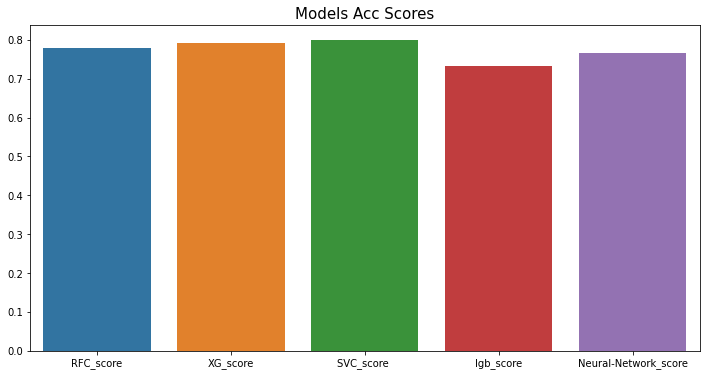

In [120]:
plt.subplots(figsize=(12,6))

sns.barplot(data = df_score  ,   order= ['RFC_score', 'XG_score', 'SVC_score ', 'lgb_score' , 'Neural-Network_score'] )
plt.title("Models Acc Scores" ,fontsize=15 )

plt.show()

In [121]:
df_score = pd.DataFrame(df_score.iloc[0].values  , columns=['FE_score'])

**All models showed good accuracy, but what would be accuracy rates of the models if we didn't use feature engineering?**

In [122]:
Ex_data = pd.read_csv( 'drive/My Drive/kaggle/diabetes/diabetes.csv')

In [123]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( Ex_data.iloc[:,:-1], Ex_data[["Outcome"]] , test_size=0.2, random_state=42)
Non_FE_predictinons_scores = dict()

**Training (Non Fe)**

---



**Random Forest Classifier (Non FE)**

In [124]:
Non_FE_classifier = RandomForestClassifier()
Non_FE_classifier.fit(X_train1,y_train1)
Non_FE_RFC_pred = Non_FE_classifier.predict(X_test1)
Non_FE_RFC_score = accuracy_score(y_test1,Non_FE_RFC_pred,normalize=True)
Non_FE_predictinons_scores['Non_FE_RFC'] = Non_FE_RFC_score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


**XGBOOST (Non FE)**

In [125]:
Non_FE_classifier = XGBClassifier()
Non_FE_classifier.fit(X_train1,y_train1)
Non_FE_XG_pred = Non_FE_classifier.predict(X_test1)
Non_FE_XG_score = accuracy_score(y_test1,Non_FE_XG_pred,normalize=True)
Non_FE_predictinons_scores['Non_FE_XG'] = Non_FE_XG_score 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


standardization

In [126]:
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.fit_transform(X_test1)

**Support Vector Machine Classifier (Non FE)**

In [127]:
Non_FE_classifier = SVC()
Non_FE_classifier.fit(X_train1,y_train1)
Non_FE_SVC_pred = Non_FE_classifier.predict(X_test1)
Non_FE_SVC_score = accuracy_score(y_test1,Non_FE_SVC_pred,normalize=True)
Non_FE_predictinons_scores['Non_FE_SVC'] = Non_FE_SVC_score 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**LightGBM (Non FE)**

In [128]:
Non_FE_classifier = lgb.LGBMClassifier()
Non_FE_classifier.fit(X_train1,y_train1)
Non_FE_lgb_pred = Non_FE_classifier.predict(X_test1)
Non_FE_lgb_score = accuracy_score(y_test1,Non_FE_lgb_pred,normalize=True)
Non_FE_predictinons_scores['Non_FE_lgb'] = Non_FE_lgb_score

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Neural Network (Non FE)**

In [129]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  
    ])
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy' ]
              )
model.fit( X_train1 , y_train1, epochs=8 )
Non_Fe_TF_pred = model.predict_classes(X_test1)
Non_Fe_TF_score = accuracy_score(y_test1,Non_Fe_TF_pred,normalize=True)
Non_FE_predictinons_scores['Non_Fe_TF_score'] = Non_Fe_TF_score

Epoch 1/8
20/20 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.6596
Epoch 2/8
20/20 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7525
Epoch 3/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.7826
Epoch 4/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7574
Epoch 5/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.7844
Epoch 6/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.7860
Epoch 7/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.7857
Epoch 8/8
20/20 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8048


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [130]:
df_Non_FE_score = pd.DataFrame( data = Non_FE_predictinons_scores ,index=[0])

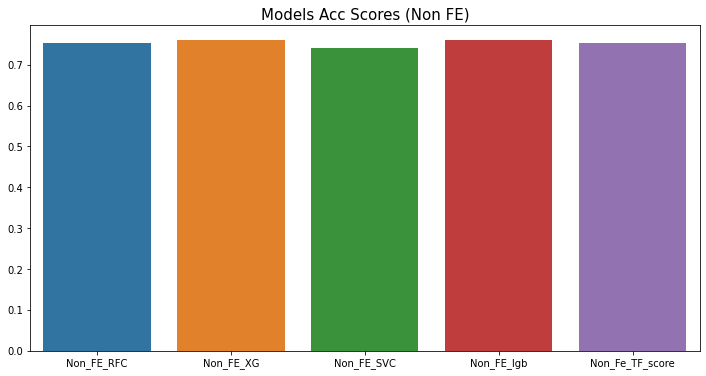

In [131]:
plt.subplots(figsize=(12,6))

sns.barplot(data = df_Non_FE_score  ,   order= ['Non_FE_RFC'	,'Non_FE_XG',	'Non_FE_SVC',	'Non_FE_lgb' , 'Non_Fe_TF_score'] )
plt.title("Models Acc Scores (Non FE)" ,fontsize=15 )

plt.show()

In [132]:
df_Non_FE_score  = pd.DataFrame(df_Non_FE_score.iloc[0].values  , columns=['Non_FE_score'])

In [133]:
df_total_scores = pd.concat( [ df_score, df_Non_FE_score] , axis = 1)

# Comparison of FE and Non FE Accuracy Scores

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


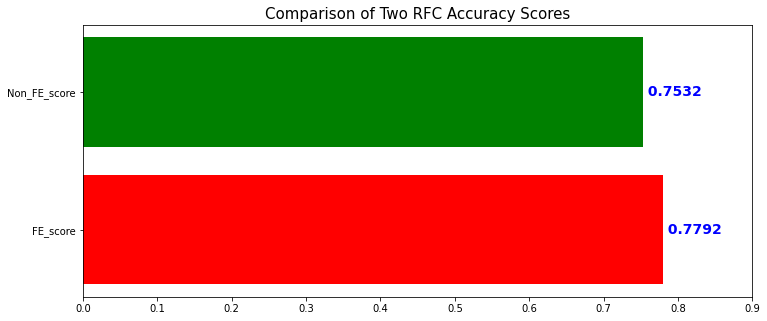

In [134]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_total_scores.iloc[0].values):
  ax.text(v, i, " "+str("%.4f" % v), color='blue', va='center', fontweight='bold',fontsize = 14)

plt.barh( df_total_scores.columns , df_total_scores.iloc[0].values,color = 'rg')
plt.title("Comparison of Two RFC Accuracy Scores" ,fontsize=15 )
plt.xlim(0,0.9)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


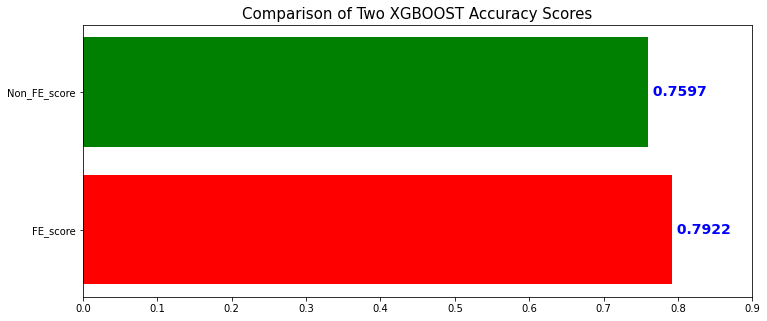

In [135]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_total_scores.iloc[1].values):
  ax.text(v, i, " "+str("%.4f" % v), color='blue', va='center', fontweight='bold', fontsize = 14)

plt.barh( df_total_scores.columns , df_total_scores.iloc[1].values,color = 'rg')
plt.title("Comparison of Two XGBOOST Accuracy Scores" ,fontsize=15 )
plt.xlim(0,0.9)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


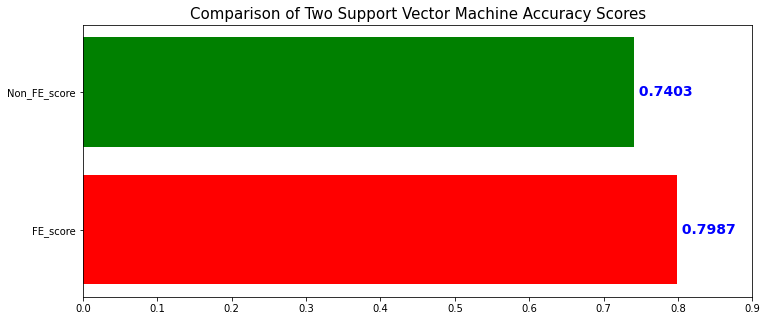

In [136]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_total_scores.iloc[2].values):
  ax.text(v, i, " "+str("%.4f" % v), color='blue', va='center', fontweight='bold', fontsize = 14)

plt.barh( df_total_scores.columns , df_total_scores.iloc[2].values,color = 'rg')
plt.title("Comparison of Two Support Vector Machine Accuracy Scores" ,fontsize=15 )
plt.xlim(0,0.9)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


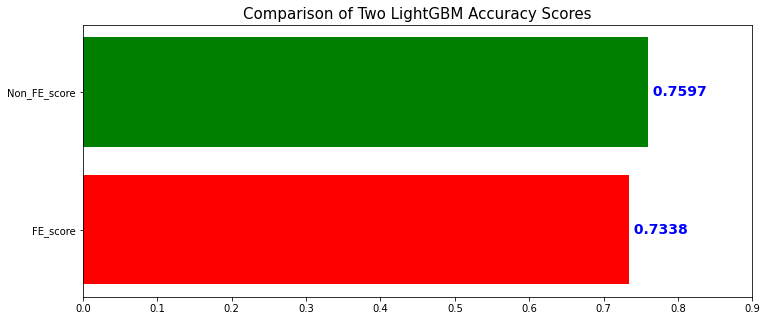

In [137]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_total_scores.iloc[3].values):
  ax.text(v, i, " "+str("%.4f" % v), color='blue', va='center', fontweight='bold', fontsize = 14)

plt.barh( df_total_scores.columns , df_total_scores.iloc[3].values,color = 'rg')
plt.title("Comparison of Two LightGBM Accuracy Scores" ,fontsize=15 )
plt.xlim(0,0.9)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


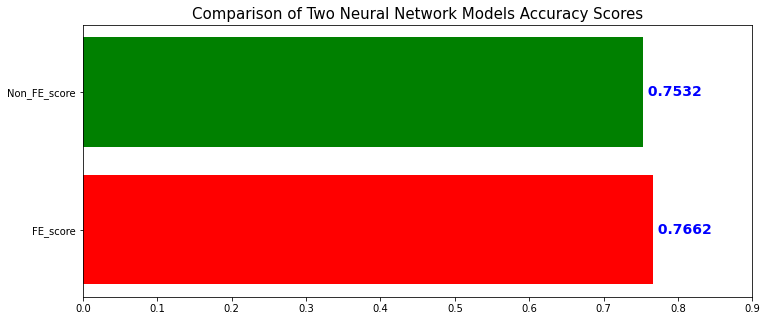

In [138]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_total_scores.iloc[4].values):
  ax.text(v, i, " "+str("%.4f" % v), color='blue', va='center', fontweight='bold', fontsize = 14)

plt.barh( df_total_scores.columns , df_total_scores.iloc[4].values,color = 'rg')
plt.title("Comparison of Two Neural Network Models Accuracy Scores" ,fontsize=15 )
plt.xlim(0,0.9)
plt.show()